In [2]:
from tssynth import MultiSensorTS, Trends, Noise, Anomalies, Dependencies, Patterns
from loguru import logger
import numpy as np
import sys

logger.add(sys.stderr, level="DEBUG")
logger.remove()

# # Create a sensor with periodic trend and gaussian noise
ts = MultiSensorTS(length=365, variation_scale=0.2)
data = Patterns.SolarPanel(length=1000, 
                     sampling_rate=1, 
                     sampling_rate_units='h', 
                     temp_anomalies=[
                            Anomalies.Point(position=250, magnitude=5.0),
                            Anomalies.Collective(start=400, duration=20, magnitude=-3.0),
                            Anomalies.Collective(start=800, duration=20, magnitude=-3.0)
                     ],
                    ).generate_similar(10, include_anomalies=True, anomaly_probability=1)



In [3]:
    >>> from tssynth import Anomalies
    >>> import numpy as np
    >>> np.random.seed(42)  # For reproducibility
    >>> 
    >>> # Create a point anomaly at position 10 with magnitude 5.0
    >>> anomaly = Anomalies.Point(position=10, magnitude=5.0)
    >>> series = np.zeros(100)
    >>> modified_series = anomaly.apply(series, np.random.default_rng(42))
    >>> modified_series[10]  # Check the anomaly value
    5.0
    >>> modified_series[9]  # Check adjacent value is unchanged
    0.0

0.0

In [5]:
modified_series[9]

np.float64(0.0)

<Axes: >

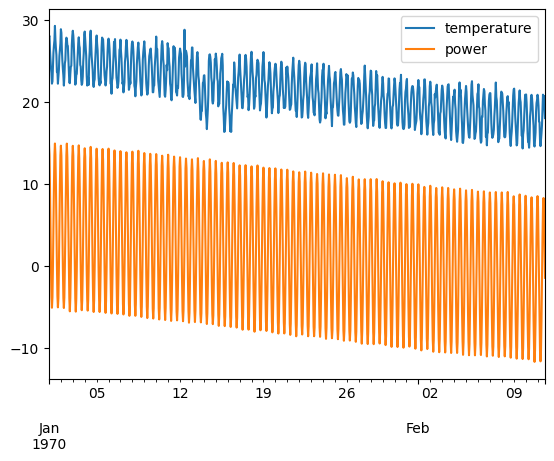

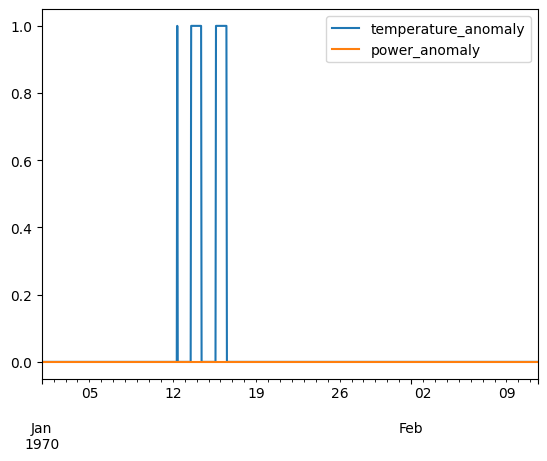

In [36]:
idx = 9
data[idx][:1000].plot(y=['temperature', 'power'])
data[idx].astype(dict(temperature_anomaly=int, power_anomaly=int))[:1000].plot(y=['temperature_anomaly', 'power_anomaly'])

In [5]:
ts.add_sensor(
    name="temperature",
    trend=Trends.Logistic(),
    noise=Noise.Gaussian(std=0.5),
    anomalies=[
        Anomalies.Point(position=250, magnitude=5.0),
        Anomalies.Collective(start=400, duration=20, magnitude=-3.0)
    ]
)


# Add another sensor with linear trend
ts.add_sensor(
    name="humidity",
    trend=Trends.Linear(slope=0.1, intercept=50),
    noise=Noise.Uniform(low=-1, high=1)
)


# Add dependencies between sensors
ts.add_dependency(
    target="humidity",
    source="temperature",
    dependency=Dependencies.Linear()
)


# Generate the time series
data = ts.generate()

2025-02-23 20:45:24.701 | DEBUG    | tssynth.anomalies:apply:75 - Applying point anomaly at position 250 with magnitude 5.0
2025-02-23 20:45:24.701 | DEBUG    | tssynth.anomalies:apply:75 - Applying point anomaly at position 250 with magnitude 5.0


2025-02-23 20:45:24.703 | WARNING  | tssynth.anomalies:apply:134 - Requested duration 20 from position 400 exceeds series length 365. Truncating.


2025-02-23 20:45:24.703 | WARNING  | tssynth.anomalies:apply:134 - Requested duration 20 from position 400 exceeds series length 365. Truncating.
2025-02-23 20:45:24.703 | WARNING  | tssynth.anomalies:apply:134 - Requested duration 20 from position 400 exceeds series length 365. Truncating.
2025-02-23 20:45:24.706 | DEBUG    | tssynth.anomalies:apply:140 - Applying collective anomaly from position 400 to 365 with magnitude -3.0
2025-02-23 20:45:24.706 | DEBUG    | tssynth.anomalies:apply:140 - Applying collective anomaly from position 400 to 365 with magnitude -3.0
2025-02-23 20:45:24.709 | DEBUG    | tssynth.dependencies:apply:69 - Applying linear dependency: slope=1.0, intercept=0.0
2025-02-23 20:45:24.709 | DEBUG    | tssynth.dependencies:apply:69 - Applying linear dependency: slope=1.0, intercept=0.0


<Axes: >

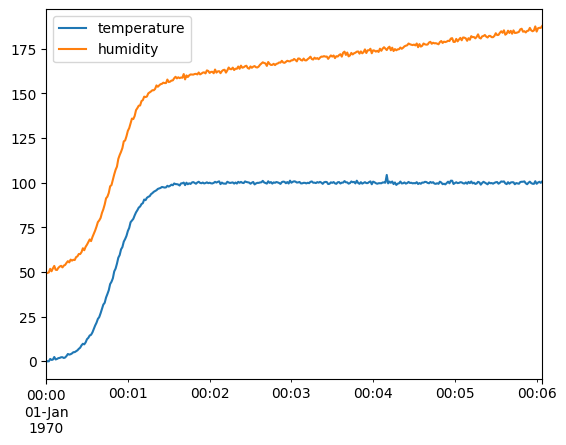

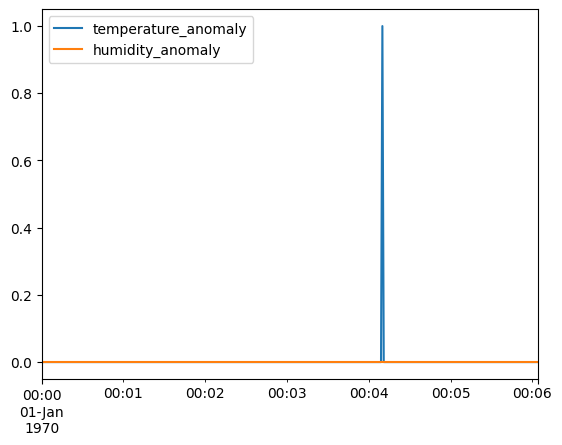

In [6]:
data.plot(y=['temperature', 'humidity'])
data = data.astype(dict(temperature_anomaly=int, humidity_anomaly=int))
data.plot(y=['temperature_anomaly', 'humidity_anomaly'])